In [1]:
import numpy as np
import networkx as nx

import pandas as pd

import matplotlib . pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

## Definições

- **Forn**: Fornecedores
- **CMAM**: Central de Medicamentos
- **ACentro**: Armazém Regional no Centro
- **ANorte**: Armazém Regional no Norte
- **ASul**: Armazem Regional no Sul
- **DPs**: Depósitos Provinciano
- **DDM**: Depósitos Distritais
- **HG**: Hospital Geral
- **CS**: Centro de Saúde

## Conjuntos
- $A = \{ 1, 2, 3 \}$: conjunto dos armazéns onde 1 é o Armazém Regional no Centro, 2 é o Armazém Regional no Norte e 3 é o Armazém Regional no Sul.
- $P = \{ 1, 2, \ldots, m \}$: conjunto dos depósitos provinciano onde $m=11$.
- $D = \{1, 2, \ldots,  n \}$: conjunto dos depósitos distrital onde $n=147$.

## Parametros

- $CostAP_{ij}$: custo de transporte do armazém $i$ para o depósito provinciano $j$, onde $i \in A$ e $j \in P$.
- $CostPD_{jk}$: custo de transporte do depósito provinciano $j$ para o depósito distrital $k$, onde $j \in P$ e $k \in D$.
- $DemD_{k}$: demanda do depósito distrital $k$, onde $k \in D$.
- $DemA_{j}$: demanda do armazem $j$, onde $j \in A$.
- $CapA_{i}$: capacidade do armazém $i$, onde $i \in A$
- $CapP_{j}$: capacidade do depósito provinciano $j$, onde $j \in P$.


## Variáveis

- $xp_{ij}$: quantidade enviado do armazeḿ $i$ para o depósito provinciano $j$, onde $i \in A$ e $j \in P$.
- $xd_{jk}$: quantidade enviado do depósito proviciano $j$ para o depósito distrital $k$, onde $j \in P$ e $k \in D$.

## Formulação

$$
\begin{align}
\min \ & \sum_{i \in A} \sum_{j \in P} CostAP_{ij} \cdot xp_{ij} + \sum_{j \in P} \sum_{k \in D} CostPD_{jk} \cdot xd_{jk} \\
& \sum_{j \in P} xp_{ij} \leq CapA_{i}, \ \forall i \in A \\
& \sum_{k \in D} xd_{jk} \leq CapP_{j}, \ \forall j \in P \\
& \sum_{j \in P} xd_{jk} \geq DemD_{k}, \forall k \in D \\
& xp_{ij} \in \mathbb{Z}_{+} \ \forall \ i \in A, \ j \in P \\
& xd_{jk} \in \mathbb{Z}_{+} \ \forall \ j \in P, \ k \in D \\
\end{align}
$$

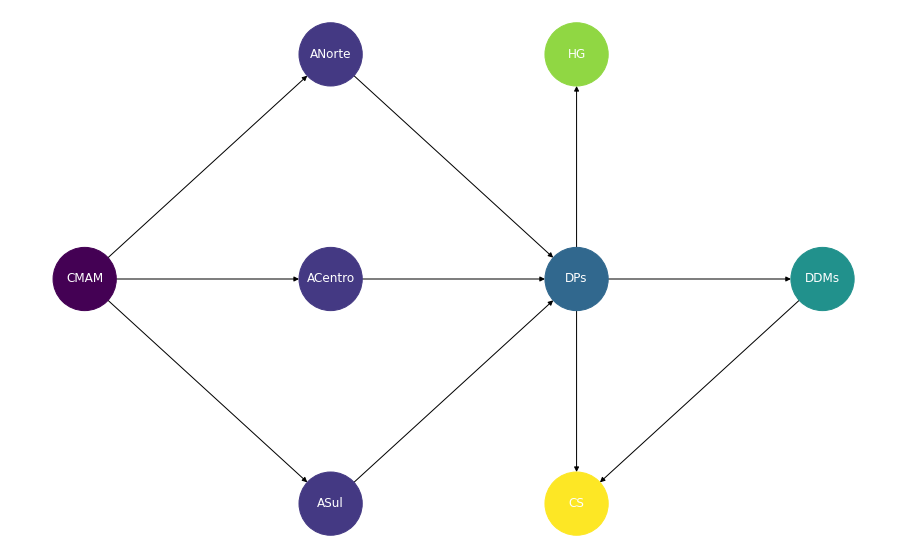

In [16]:
G = nx.DiGraph()

#nodes0 = ["Forn"]
nodes1 = ["CMAM"]
nodes2 = ["ACentro", "ASul", "ANorte"]
nodes3 = ["DPs"]
nodes4 = ["DDMs"]

color = dict()
color = {
    "CMAM": 0,
    "ACentro": 1,
    "ASul": 1,
    "ANorte": 1,
    "DPs": 2,
    "DDMs": 3,
#    "Forn":4,
    "HG": 5,
    "CS": 6
}
color = list(color.values())

G.add_nodes_from(nodes1)
G.add_nodes_from(nodes2)
G.add_nodes_from(nodes3)
G.add_nodes_from(nodes4)
#G.add_nodes_from(nodes0)
G.add_node("HG")
G.add_node("CS")

# layout position
pos = {}
pos["CMAM"] = [0.0,0.0]
pos["ANorte"] = [0.5,0.5]
pos["ACentro"] = [0.5,0.0]
pos["ASul"] = [0.5,-0.5]
pos["DPs"] = [1.0,0.0]
pos["DDMs"] = [1.5,0.0]
#pos["Forn"] = [-0.5,0.0]
pos["HG"] = [1.0,0.5]
pos["CS"] = [1.0,-0.5]

#link0 = [("Forn","CMAM")]
link1 = [("CMAM", "ACentro"), ("CMAM", "ASul"), ("CMAM", "ANorte")]
link2 = [("ACentro","DPs"), ("ASul","DPs"), ("ANorte","DPs")]
link3 = [("DPs","DDMs")]
link4 = [("DPs","HG")]
link5 = [("DPs","CS")]
link6 = [("DDMs","CS")]

fig, ax = plt.subplots(1,1,figsize=(16,10))

G.add_edges_from(link1)
G.add_edges_from(link2)
G.add_edges_from(link3)
#G.add_edges_from(link0)
G.add_edges_from(link4)
G.add_edges_from(link5)
G.add_edges_from(link6)

nx.draw(G, pos=pos, node_size=4000, with_labels=True, arrows=True, node_color=color, font_color='white')

plt.axis("off")

plt.show()

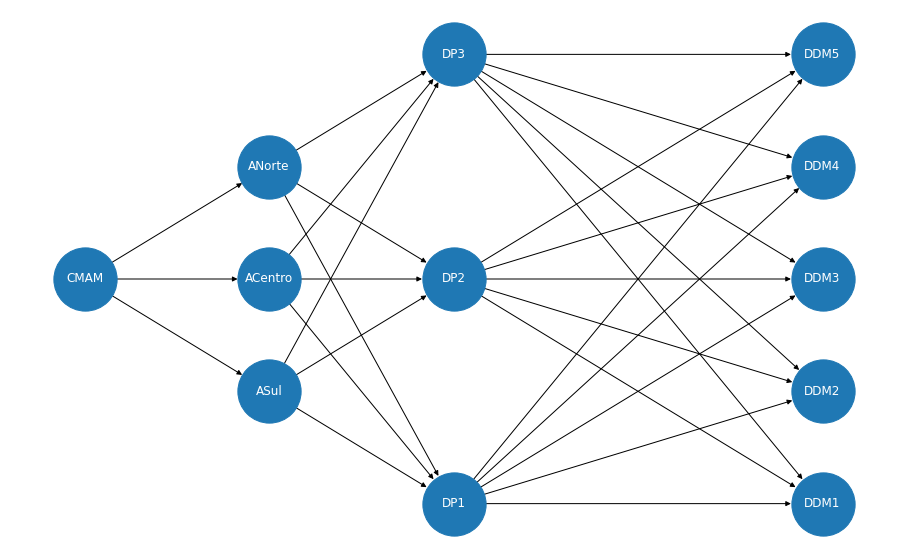

In [8]:
G = nx.DiGraph()

#nodes0 = ["Forn1","Forn2","Forn3"]
nodes1 = ["CMAM"]
nodes2 = ["ACentro", "ASul", "ANorte"]
nodes3 = ["DP1","DP2","DP3"]
nodes4 = ["DDM1", "DDM2", "DDM3", "DDM4", "DDM5"]

color = dict()
#color = {
#    "CMAM": 0,
#    "ACentro": 1, "ASul": 1, "ANorte": 1,
#    "DP1": 2, "DP2": 2, "DP3": 2,
#    "DDM1": 3, "DDM2": 3, "DDM3": 3, "DDM4": 3, "DDM5": 3,
#    "Forn1": 4, "Forn2": 4, "Forn3": 4
#}
#color = list(color.values())

#G.add_nodes_from(nodes0)
G.add_nodes_from(nodes1)
G.add_nodes_from(nodes2)
G.add_nodes_from(nodes3)
G.add_nodes_from(nodes4)

# layout position
pos = {}
pos["CMAM"] = [0.0,0.0]
pos["ANorte"] = [0.5,0.5]
pos["ACentro"] = [0.5,0.0]
pos["ASul"] = [0.5,-0.5]
pos["DP1"] = [1.0,-1.0]
pos["DP2"] = [1.0,-0.0]
pos["DP3"] = [1.0,1.0]
pos["DDM1"] = [2.0,-1.0]
pos["DDM2"] = [2.0,-0.5]
pos["DDM3"] = [2.0,0.0]
pos["DDM4"] = [2.0,0.5]
pos["DDM5"] = [2.0,1.0]
#pos["Forn1"] = [-0.5,0.5]
#pos["Forn2"] = [-0.5,0.0]
#pos["Forn3"] = [-0.5,-0.5]

#link0 = [("Forn1","CMAM"), ("Forn2","CMAM"), ("Forn3","CMAM")]

link1 = [("CMAM", "ACentro"), ("CMAM", "ASul"), ("CMAM", "ANorte")]

link2 = [("ACentro","DP1"),("ACentro","DP2"),("ACentro","DP3"), 
         ("ASul","DP1"),("ASul","DP2"),("ASul","DP3"), 
         ("ANorte","DP1"), ("ANorte","DP2"), ("ANorte","DP3")]

link3 = [("DP1","DDM1"),("DP1","DDM2"),("DP1","DDM3"),("DP1","DDM4"),("DP1","DDM5"),
         ("DP2","DDM1"),("DP2","DDM2"),("DP2","DDM3"),("DP2","DDM4"),("DP2","DDM5"),
         ("DP3","DDM1"),("DP3","DDM2"),("DP3","DDM3"),("DP3","DDM4"),("DP3","DDM5")]

fig, ax = plt.subplots(1,1,figsize=(16,10))

#G.add_edges_from(link0)
G.add_edges_from(link1)
G.add_edges_from(link2)
G.add_edges_from(link3)

nx.draw(G, pos=pos, node_size=4000, with_labels=True, arrows=True, font_color='white')


plt.show()